In [1]:
pip install -U ipykernel

  Using cached ipykernel-6.22.0-py3-none-any.whl (149 kB)
  Using cached comm-0.1.3-py3-none-any.whl (6.6 kB)
  Using cached jupyter_core-5.3.0-py3-none-any.whl (93 kB)
  Using cached debugpy-1.6.7-cp39-cp39-win_amd64.whl (4.8 MB)
  Attempting uninstall: jupyter-core
    Found existing installation: jupyter-core 4.9.2
    Uninstalling jupyter-core-4.9.2:
      Successfully uninstalled jupyter-core-4.9.2
  Attempting uninstall: debugpy
    Found existing installation: debugpy 1.5.1
    Uninstalling debugpy-1.5.1:
      Successfully uninstalled debugpy-1.5.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'C:\\Users\\liza_\\anaconda3\\Lib\\site-packages\\~ebugpy\\_vendored\\pydevd\\_pydevd_bundle\\pydevd_cython.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [3]:
# импорт библиотек
import pandas as pd
import numpy as np
import pandas as pd
df = pd.read_parquet('train_mfti.parquet', engine='pyarrow')
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
data = pd.read_parquet('test_public_mfti.parquet', engine='pyarrow')

In [5]:
data.head()

,cookie_id,vacancy_id_
0,000cd76cd33f43d4a1ac1d16d10f8bf7,"[222177, 222173, 222163, 238874, 238878, 228125, 225604, 235544, 119314]"
1,0034bc7f404341ba8412665453e7825a,"[102794, 137587, 257319, 237756, 240744, 113482, 240245, 221376, 242642, 235561, 191512, 222762, 231446, 109269, 205578]"
2,00a6c5a64a274c55a836402bdeb3b2c4,"[254292, 164602, 116438, 228634, 218819, 240655, 240659, 237341, 176563, 255299, 245637, 109275, 111505, 212953, 217549, 207108, 200475, 211355, 211449, 108956, 111071, 253239, 109649, 221735, 222030, 222174, 231207, 231022, 234380, 106944, 203948, 175325, 193534, 197505, 234769, 238933, 225709, 184466, 242642, 203015]"
3,015937a125b14e74bdff1cddc49f9172,"[246685, 138123, 115420, 210628, 212325, 235196]"
4,01de50c280794cec8804f16f45f847b7,"[219070, 251469, 166899, 212703, 214561]"


In [6]:
df.head()

,event_date,event_timestamp,vacancy_id_,cookie_id,user_id,event_type
0,2022-08-01,1659323026,129850,97990f1a021d4be19aa3f955b7eacab4,951f53de61764ea0b51317200a0dbbfc,show_vacancy
1,2022-08-01,1659377255,108347,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy
2,2022-08-01,1659376695,109069,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy
3,2022-08-01,1659376722,171425,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy
4,2022-08-01,1659374929,252384,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy


In [91]:
features = ['click_contacts',	'click_favorite',	'click_phone',	'click_response', 'preview_click_phone',	'preview_click_response']
df['Good'] = df.apply(lambda row:'Good' if row['event_type'] in features else 'Bad', axis=1)
df['Register'] = df.apply(lambda row:'не зарегистрирован' if row['user_id'] == None else 'зарегистрирован', axis=1)
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'], unit='s')
df['time'] = df['event_timestamp'].dt.time
df['hour'] = df['event_timestamp'].dt.hour

In [92]:
df.head()

,event_date,event_timestamp,vacancy_id_,cookie_id,user_id,event_type,Good,Register,time,hour
0,2022-08-01,2022-08-01 03:03:46,129850,97990f1a021d4be19aa3f955b7eacab4,951f53de61764ea0b51317200a0dbbfc,show_vacancy,Bad,зарегистрирован,03:03:46,3
1,2022-08-01,2022-08-01 18:07:35,108347,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,Bad,зарегистрирован,18:07:35,18
2,2022-08-01,2022-08-01 17:58:15,109069,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,Bad,зарегистрирован,17:58:15,17
3,2022-08-01,2022-08-01 17:58:42,171425,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,Bad,зарегистрирован,17:58:42,17
4,2022-08-01,2022-08-01 17:28:49,252384,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,Bad,зарегистрирован,17:28:49,17


In [93]:
df_v=df.loc[df['Good'] == 'Good']

In [94]:
df_v.head()

,event_date,event_timestamp,vacancy_id_,cookie_id,user_id,event_type,Good,Register,time,hour
10980169,2022-09-28,2022-09-28 02:10:52,240663,aad6bd141af1440ca6ee0be6fb5d24fa,None,click_contacts,Good,не зарегистрирован,02:10:52,2
10980170,2022-09-28,2022-09-28 04:44:26,240663,445b6260186248489ae957e68db9e845,None,click_contacts,Good,не зарегистрирован,04:44:26,4
10980171,2022-09-28,2022-09-28 04:43:48,240663,445b6260186248489ae957e68db9e845,None,click_contacts,Good,не зарегистрирован,04:43:48,4
10980172,2022-09-28,2022-09-28 07:10:35,251234,99a635685ed84f158d26ab6632fa7c31,None,click_contacts,Good,не зарегистрирован,07:10:35,7
10980173,2022-09-28,2022-09-28 11:12:50,251234,99a635685ed84f158d26ab6632fa7c31,None,click_contacts,Good,не зарегистрирован,11:12:50,11


In [95]:
df_vectorsX = df_v.groupby('vacancy_id_')['cookie_id'].apply(list)
df_vectorsY = df_v.groupby('cookie_id')['vacancy_id_'].apply(list)

In [96]:
df_vectorsX=pd.DataFrame({'vacancy_id_':df_vectorsX.index, 'good_cookies':df_vectorsX.values})
df_vectorsY=pd.DataFrame({'cookie_id':df_vectorsY.index, 'good_vacancies':df_vectorsY.values})

In [97]:
data=data.explode('vacancy_id_')

In [98]:
data['vacancy_id_']=data['vacancy_id_'].astype('int64')

In [99]:
df_vectorsX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123935 entries, 0 to 123934
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   vacancy_id_   123935 non-null  int64 
 1   good_cookies  123935 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [100]:
how_predict_all=pd.merge(df_vectorsX, data, on='vacancy_id_', how='inner')
how_predict_all=pd.merge(df_vectorsY, how_predict_all, on='cookie_id', how='inner')

In [101]:
how_predict_all.head()

,cookie_id,good_vacancies,vacancy_id_,good_cookies
0,000cd76cd33f43d4a1ac1d16d10f8bf7,"[258095, 156688]",119314,"[a29dfaef8513405781cd7f263289bc26, 31fa2f19db294a2da5f7c4b8a046a0a9, 35d5b50f3ea647f28f0b617e93bb0bd8, 37fbb7bf1a9b4dd7807b2aaca8f2e6f7, 51ba637d6f26494986623d750247c613, cb8f1f514b1c46b4868fba044f7d6c63, a29dfaef8513405781cd7f263289bc26, bb58f4ab873a48f4b2ab9a19b60b3208, 07885e0ab9ae4720bdc592ed3eace916, 0577b66c942743979bbf83f5b6a68c09, 68c2d07d65734cca9143c8d366244e16, bdf1cd81fbd04888b79cd58238001ca4, 45ea7669d4dd42e4aa1bb8b00f168c5b, cb8f1f514b1c46b4868fba044f7d6c63, 56edd8a349074a29a8ab6e4efc236ccf, 943966a2c9b04d50a90feb6851c05f08, 1888ee7e415241b886c0ac92c2b1da23, cb8f1f514b1c46b4868fba044f7d6c63, 5516ea297f304cd58cecff5c564da673, 02d22419c213466d81712a5b4648b017, 02d22419c213466d81712a5b4648b017, b19ba4e4d27b4590a2b3b51149208129, abbe6a432ca04439a171bb5b219d7571, 1685e08ca2534c96aa372f5c88892437, 1685e08ca2534c96aa372f5c88892437, 565eda9dc0384517882eec96a7e519b5, 611f76c1aba34fdf994ee13097d0a3dd, e595f6f53e3846dd84dc1565a9450300, 6a96bcbc74c04adeb4c61f202e181e17, 5881ea88005d4ed6af21dd09db579aa7, cf729d2ba4434b7fb06e975ee20d8cbf, 2e697cdc33d24f2487e55ef7d5791555, b79cccb5f50b4599bf296ba054607816]"
1,000cd76cd33f43d4a1ac1d16d10f8bf7,"[258095, 156688]",222163,"[7709b1c8725748a0a681054d1040bde9, c8931b9f9e014602bb2f0330ff8ed270, 7ac819ece7f44e49822758b3d5cfb1fd]"
2,000cd76cd33f43d4a1ac1d16d10f8bf7,"[258095, 156688]",222173,"[c35a9544222c45e4a4d16faa9438ab15, 1f6a20eef6084c0489052c790ab73da5, 2e04abee5b6d47e9bea13e2233337347, 2c8c77a7b915434db4d5f6db2aaa6936, c8931b9f9e014602bb2f0330ff8ed270]"
3,000cd76cd33f43d4a1ac1d16d10f8bf7,"[258095, 156688]",222177,"[d2244f2bc15c426d987727595acb89e3, dcd21337d9de4fb7b50c3700599d7e60, dcd21337d9de4fb7b50c3700599d7e60, f9a25dae98c4421386b43411a780164a, 622cb1b2b58d45af9629cefb11c56fb3, daff820277704b9092fa580d2ce4a367, daff820277704b9092fa580d2ce4a367, 9c482bbf960746dbbed0f454dd17c41b, 622cb1b2b58d45af9629cefb11c56fb3, 48bfa48cc1854ef39d2342ec649bfc53, daff820277704b9092fa580d2ce4a367, 2c8c77a7b915434db4d5f6db2aaa6936, 93443970a55948068e73295e2e2e5dab, daff820277704b9092fa580d2ce4a367, c8931b9f9e014602bb2f0330ff8ed270]"
4,000cd76cd33f43d4a1ac1d16d10f8bf7,"[258095, 156688]",225604,"[a13f70c2c648440ba1b5fb33e178925c, 912f69d8b2284e6689a73ab765fcc11e, 912f69d8b2284e6689a73ab765fcc11e, 912f69d8b2284e6689a73ab765fcc11e, 8a0841eb79ea42f4826fe6fd1a786c37, 912f69d8b2284e6689a73ab765fcc11e, 9cbd0a95b55f4c2d857a0e090ae2beab]"


In [102]:
how_predict=how_predict_all.explode('good_cookies')
how_predict=how_predict.explode('good_vacancies')

In [103]:
how_predict=how_predict.rename(columns={'good_vacancies': 'good_vacancy_for this_cookie', 'good_cookies': 'cookie_acting_good_for_vacancies'})

In [104]:
how_predict_all_1=how_predict_all.loc[(how_predict_all['vacancy_id_']==119314) | (how_predict_all['vacancy_id_']==258095) | (how_predict_all['vacancy_id_']==156688)]
how_predict_all_1

,cookie_id,good_vacancies,vacancy_id_,good_cookies
0,000cd76cd33f43d4a1ac1d16d10f8bf7,"[258095, 156688]",119314,"[a29dfaef8513405781cd7f263289bc26, 31fa2f19db294a2da5f7c4b8a046a0a9, 35d5b50f3ea647f28f0b617e93bb0bd8, 37fbb7bf1a9b4dd7807b2aaca8f2e6f7, 51ba637d6f26494986623d750247c613, cb8f1f514b1c46b4868fba044f7d6c63, a29dfaef8513405781cd7f263289bc26, bb58f4ab873a48f4b2ab9a19b60b3208, 07885e0ab9ae4720bdc592ed3eace916, 0577b66c942743979bbf83f5b6a68c09, 68c2d07d65734cca9143c8d366244e16, bdf1cd81fbd04888b79cd58238001ca4, 45ea7669d4dd42e4aa1bb8b00f168c5b, cb8f1f514b1c46b4868fba044f7d6c63, 56edd8a349074a29a8ab6e4efc236ccf, 943966a2c9b04d50a90feb6851c05f08, 1888ee7e415241b886c0ac92c2b1da23, cb8f1f514b1c46b4868fba044f7d6c63, 5516ea297f304cd58cecff5c564da673, 02d22419c213466d81712a5b4648b017, 02d22419c213466d81712a5b4648b017, b19ba4e4d27b4590a2b3b51149208129, abbe6a432ca04439a171bb5b219d7571, 1685e08ca2534c96aa372f5c88892437, 1685e08ca2534c96aa372f5c88892437, 565eda9dc0384517882eec96a7e519b5, 611f76c1aba34fdf994ee13097d0a3dd, e595f6f53e3846dd84dc1565a9450300, 6a96bcbc74c04adeb4c61f202e181e17, 5881ea88005d4ed6af21dd09db579aa7, cf729d2ba4434b7fb06e975ee20d8cbf, 2e697cdc33d24f2487e55ef7d5791555, b79cccb5f50b4599bf296ba054607816]"
1105,2c2c702edb354e8b849a073e5117635f,"[163315, 226716, 163315]",156688,"[b307105103594afa80ef818674c6bedf, d2c5113674bd4b66830fbd843c445e3f, 7cdbf4eb78564f859acbf06bd4507cda, 7cdbf4eb78564f859acbf06bd4507cda, d2c5113674bd4b66830fbd843c445e3f, b613987bf3734ba4af1edd77565e5ec7, 289d8dea50834fb1b2aff283d667e54a, b77ee4fe626f4d829b67d9c07fcc8def, e5cf40c86f31475d8b7300b8f853ebeb, e5cf40c86f31475d8b7300b8f853ebeb, 7b659384dce943249d8750bd7906cbaf, b613987bf3734ba4af1edd77565e5ec7, 56edd8a349074a29a8ab6e4efc236ccf, 9ac729c1bfb04c32a2f93bd3ac3a01d1, 855127e079924a70ba6bdad0c47917c7, 3fb6593cc2804874bb407e3161d220f1, b613987bf3734ba4af1edd77565e5ec7, 000cd76cd33f43d4a1ac1d16d10f8bf7, 09130c43b00c4b96b96d4f780f124f9f, 855127e079924a70ba6bdad0c47917c7, e5cf40c86f31475d8b7300b8f853ebeb, 131c12a2e1934d9e8b06ed3cfb9b64b9, 63adfd16de9b4b5fb4c9ada9831adcbe]"
1693,3e774da26b3c42058fbe16ec4cc30096,"[243587, 259575, 121757, 143535, 110457, 203620, 250648, 100102, 100300, 111371, 120899, 138888, 151777, 152949, 137179, 111340, 143535, 100300, 102212, 123340, 138888, 152949]",119314,"[a29dfaef8513405781cd7f263289bc26, 31fa2f19db294a2da5f7c4b8a046a0a9, 35d5b50f3ea647f28f0b617e93bb0bd8, 37fbb7bf1a9b4dd7807b2aaca8f2e6f7, 51ba637d6f26494986623d750247c613, cb8f1f514b1c46b4868fba044f7d6c63, a29dfaef8513405781cd7f263289bc26, bb58f4ab873a48f4b2ab9a19b60b3208, 07885e0ab9ae4720bdc592ed3eace916, 0577b66c942743979bbf83f5b6a68c09, 68c2d07d65734cca9143c8d366244e16, bdf1cd81fbd04888b79cd58238001ca4, 45ea7669d4dd42e4aa1bb8b00f168c5b, cb8f1f514b1c46b4868fba044f7d6c63, 56edd8a349074a29a8ab6e4efc236ccf, 943966a2c9b04d50a90feb6851c05f08, 1888ee7e415241b886c0ac92c2b1da23, cb8f1f514b1c46b4868fba044f7d6c63, 5516ea297f304cd58cecff5c564da673, 02d22419c213466d81712a5b4648b017, 02d22419c213466d81712a5b4648b017, b19ba4e4d27b4590a2b3b51149208129, abbe6a432ca04439a171bb5b219d7571, 1685e08ca2534c96aa372f5c88892437, 1685e08ca2534c96aa372f5c88892437, 565eda9dc0384517882eec96a7e519b5, 611f76c1aba34fdf994ee13097d0a3dd, e595f6f53e3846dd84dc1565a9450300, 6a96bcbc74c04adeb4c61f202e181e17, 5881ea88005d4ed6af21dd09db579aa7, cf729d2ba4434b7fb06e975ee20d8cbf, 2e697cdc33d24f2487e55ef7d5791555, b79cccb5f50b4599bf296ba054607816]"


In [105]:
how_predict_all_2=how_predict_all.loc[(how_predict_all['cookie_id']=='000cd76cd33f43d4a1ac1d16d10f8bf7')]
v= how_predict_all_2['vacancy_id_'].unique()
how_predict_all_2

,cookie_id,good_vacancies,vacancy_id_,good_cookies
0,000cd76cd33f43d4a1ac1d16d10f8bf7,"[258095, 156688]",119314,"[a29dfaef8513405781cd7f263289bc26, 31fa2f19db294a2da5f7c4b8a046a0a9, 35d5b50f3ea647f28f0b617e93bb0bd8, 37fbb7bf1a9b4dd7807b2aaca8f2e6f7, 51ba637d6f26494986623d750247c613, cb8f1f514b1c46b4868fba044f7d6c63, a29dfaef8513405781cd7f263289bc26, bb58f4ab873a48f4b2ab9a19b60b3208, 07885e0ab9ae4720bdc592ed3eace916, 0577b66c942743979bbf83f5b6a68c09, 68c2d07d65734cca9143c8d366244e16, bdf1cd81fbd04888b79cd58238001ca4, 45ea7669d4dd42e4aa1bb8b00f168c5b, cb8f1f514b1c46b4868fba044f7d6c63, 56edd8a349074a29a8ab6e4efc236ccf, 943966a2c9b04d50a90feb6851c05f08, 1888ee7e415241b886c0ac92c2b1da23, cb8f1f514b1c46b4868fba044f7d6c63, 5516ea297f304cd58cecff5c564da673, 02d22419c213466d81712a5b4648b017, 02d22419c213466d81712a5b4648b017, b19ba4e4d27b4590a2b3b51149208129, abbe6a432ca04439a171bb5b219d7571, 1685e08ca2534c96aa372f5c88892437, 1685e08ca2534c96aa372f5c88892437, 565eda9dc0384517882eec96a7e519b5, 611f76c1aba34fdf994ee13097d0a3dd, e595f6f53e3846dd84dc1565a9450300, 6a96bcbc74c04adeb4c61f202e181e17, 5881ea88005d4ed6af21dd09db579aa7, cf729d2ba4434b7fb06e975ee20d8cbf, 2e697cdc33d24f2487e55ef7d5791555, b79cccb5f50b4599bf296ba054607816]"
1,000cd76cd33f43d4a1ac1d16d10f8bf7,"[258095, 156688]",222163,"[7709b1c8725748a0a681054d1040bde9, c8931b9f9e014602bb2f0330ff8ed270, 7ac819ece7f44e49822758b3d5cfb1fd]"
2,000cd76cd33f43d4a1ac1d16d10f8bf7,"[258095, 156688]",222173,"[c35a9544222c45e4a4d16faa9438ab15, 1f6a20eef6084c0489052c790ab73da5, 2e04abee5b6d47e9bea13e2233337347, 2c8c77a7b915434db4d5f6db2aaa6936, c8931b9f9e014602bb2f0330ff8ed270]"
3,000cd76cd33f43d4a1ac1d16d10f8bf7,"[258095, 156688]",222177,"[d2244f2bc15c426d987727595acb89e3, dcd21337d9de4fb7b50c3700599d7e60, dcd21337d9de4fb7b50c3700599d7e60, f9a25dae98c4421386b43411a780164a, 622cb1b2b58d45af9629cefb11c56fb3, daff820277704b9092fa580d2ce4a367, daff820277704b9092fa580d2ce4a367, 9c482bbf960746dbbed0f454dd17c41b, 622cb1b2b58d45af9629cefb11c56fb3, 48bfa48cc1854ef39d2342ec649bfc53, daff820277704b9092fa580d2ce4a367, 2c8c77a7b915434db4d5f6db2aaa6936, 93443970a55948068e73295e2e2e5dab, daff820277704b9092fa580d2ce4a367, c8931b9f9e014602bb2f0330ff8ed270]"
4,000cd76cd33f43d4a1ac1d16d10f8bf7,"[258095, 156688]",225604,"[a13f70c2c648440ba1b5fb33e178925c, 912f69d8b2284e6689a73ab765fcc11e, 912f69d8b2284e6689a73ab765fcc11e, 912f69d8b2284e6689a73ab765fcc11e, 8a0841eb79ea42f4826fe6fd1a786c37, 912f69d8b2284e6689a73ab765fcc11e, 9cbd0a95b55f4c2d857a0e090ae2beab]"
5,000cd76cd33f43d4a1ac1d16d10f8bf7,"[258095, 156688]",228125,"[3ee2a770a7d6431485983b12990c88d5, bba3fe33777c48adb9ef8981971daf6b, bba3fe33777c48adb9ef8981971daf6b, bba3fe33777c48adb9ef8981971daf6b, f402ebb5c4554279ac6a79f80a75c482, b3fde2de87dc4e5c89ed1191703b0e21, 68a439dcb9b741ac84dcdac5eb7f0a4e, d5633da09eb940eb8f1f77fe473e4eda, 9e96ece18bbd48ddb6bbb2bac2e57f85, 9e96ece18bbd48ddb6bbb2bac2e57f85, 198825df0572405ab2d8530616173f8a, 196ff00b16fd475394e2738befef179b]"
6,000cd76cd33f43d4a1ac1d16d10f8bf7,"[258095, 156688]",235544,"[0626a47dc63a40f7bf02a70805fe83b0, 0626a47dc63a40f7bf02a70805fe83b0, b2d56ce6b15e4a1ab4763ca6170673d5, 26448ce199d04ccba900e3d03c409ec9, b2d56ce6b15e4a1ab4763ca6170673d5, 2e5380b160214e8e9342b7a69cae8bb6]"
7,000cd76cd33f43d4a1ac1d16d10f8bf7,"[258095, 156688]",238874,"[9e9192a1c9df43588904009bd7bc9220, 9e9192a1c9df43588904009bd7bc9220, a13f70c2c648440ba1b5fb33e178925c, 9e9192a1c9df43588904009bd7bc9220, 9e9192a1c9df43588904009bd7bc9220, a13f70c2c648440ba1b5fb33e178925c, 1399af31404d44c7b4215e8c07814708, 7a783c4daffa46d1beeac680b2466eae]"
8,000cd76cd33f43d4a1ac1d16d10f8bf7,"[258095, 156688]",238878,"[b2d56ce6b15e4a1ab4763ca6170673d5, e5fa3c1142974816b87643977559e5fd, e5fa3c1142974816b87643977559e5fd, b2d56ce6b15e4a1ab4763ca6170673d5, b30cdbd25cad459780f006e2ad8ba1df, dc898aae79fa4c46b1bffd2083a77436, b2d56ce6b15e4a1ab4763ca6170673d5, 7a783c4daffa46d1beeac680b2466eae]"


## Итак, мы ищем закономерность для cookie_id_1=000cd76cd33f43d4a1ac1d16d10f8bf7. 
## Хорошие вакансии для этого cookie=[258095, 156688].
## Рассмотрим другие хорошие cookie для этих вакансий

In [106]:
how_predict_all_3=df_vectorsX.loc[(df_vectorsX['vacancy_id_']==258095) | (df_vectorsX['vacancy_id_']==156688)]
how_predict_all_3

,vacancy_id_,good_cookies
42731,156688,"[b307105103594afa80ef818674c6bedf, d2c5113674bd4b66830fbd843c445e3f, 7cdbf4eb78564f859acbf06bd4507cda, 7cdbf4eb78564f859acbf06bd4507cda, d2c5113674bd4b66830fbd843c445e3f, b613987bf3734ba4af1edd77565e5ec7, 289d8dea50834fb1b2aff283d667e54a, b77ee4fe626f4d829b67d9c07fcc8def, e5cf40c86f31475d8b7300b8f853ebeb, e5cf40c86f31475d8b7300b8f853ebeb, 7b659384dce943249d8750bd7906cbaf, b613987bf3734ba4af1edd77565e5ec7, 56edd8a349074a29a8ab6e4efc236ccf, 9ac729c1bfb04c32a2f93bd3ac3a01d1, 855127e079924a70ba6bdad0c47917c7, 3fb6593cc2804874bb407e3161d220f1, b613987bf3734ba4af1edd77565e5ec7, 000cd76cd33f43d4a1ac1d16d10f8bf7, 09130c43b00c4b96b96d4f780f124f9f, 855127e079924a70ba6bdad0c47917c7, e5cf40c86f31475d8b7300b8f853ebeb, 131c12a2e1934d9e8b06ed3cfb9b64b9, 63adfd16de9b4b5fb4c9ada9831adcbe]"
122330,258095,"[e837187d9d0b4f77a64d00ffa65e207d, a3caa5ab54ee4c58b79d9c1db6d7fb03, 94f2efb02a214ef0bd310fcd53a7d98c, e7a98e7d07d440049dd2277d5bd4770d, 0eb7d8737bb748dba0701e90879618db, f0533ab4e0454189b4b899ddfeff765b, 4f6d85c613334c9496f3c9b77f1fcaa7, 3100ac2a457143e89a518d1aa09c470b, 83972f7f10d24a04aa5a8efc00856734, 8cb6b7cf567c40518db29ceae4954b3b, 02117365ef9c4434830043ed3400cd65, 61492f2550d94ddb952e3891fb9a9d74, ee0be1ca023744588eae60ce2670a685, ee0be1ca023744588eae60ce2670a685, ee0be1ca023744588eae60ce2670a685, 636e644c660d42a09af8fd9b48088a02, 6900014e6b2c4775ad6e5e16c23c4878, c1d836da2b834f8490693ef96ffb764c, c1d836da2b834f8490693ef96ffb764c, ec11b7a2eb0246f29198cf0a27e31a89, 61492f2550d94ddb952e3891fb9a9d74, c02af7392dad4fd39d01e73561c86b49, 10129abbec5341e3b5fbbd30aadbc074, 5bf59cf23de24452ac8de98361630314, fe758c37b073496bbcc617d7575f6824, 60b181ec448f4d44af31a8dd39245ba4, 000cd76cd33f43d4a1ac1d16d10f8bf7, 148f78130fcd4c488ef4c3109fbb18f9, 51e97b80c5e94af39d143034cdc77de8, 5bf59cf23de24452ac8de98361630314, 99ca81d74aa6453b8e747f61e5b5326d, 21bc58acbcea456e91bc0d6e2c8bcf4e, d69a1866f1344536a3d8365343744faf, 7c80614251904e6b97acc35737a86f35, ab082f257636459a8cf0869c9a4365cc, ab082f257636459a8cf0869c9a4365cc, 2748bc00e4a24231b47333523cc62668, b10132f8c0ea434499ebeacb78b085c3]"


In [113]:
how_predict_all_35=df_vectorsY.loc[(df_vectorsY['cookie_id']=='000cd76cd33f43d4a1ac1d16d10f8bf7')]
gv=(how_predict_all_35.explode('good_vacancies'))['good_vacancies'].unique()


In [114]:
how_predict_all_4=how_predict_all_3.explode('good_cookies')

In [115]:
gc = how_predict_all_4['good_cookies'].unique() # gc- хорошие cookie для хороших вакансий этого cookie_1
c = (how_predict_all_2.explode('good_cookies'))['good_cookies'].unique() # c- хорошие cookie для предсказанных вакансий этого cookie_1
v= how_predict_all_2['vacancy_id_'].unique() # v- список предсказанных вакансий для cookie_1
gv=(how_predict_all_35.explode('good_vacancies'))['good_vacancies'].unique() # v- список хороших вакансий для cookie_1


In [116]:
df_vac=df_v[df_v['vacancy_id_'].isin(v)]
with pd.option_context("display.min_rows", 50, "display.max_rows", 100, \
                       "display.max_columns", 15, 'display.max_colwidth', 150):
    display(df_vac.sort_values('event_type').head())

,event_date,event_timestamp,vacancy_id_,cookie_id,user_id,event_type,Good,Register,time,hour
11081941,2022-09-28,2022-09-28 11:52:26,222173,c35a9544222c45e4a4d16faa9438ab15,None,click_contacts,Good,не зарегистрирован,11:52:26,11
11863088,2022-09-27,2022-09-26 21:11:30,222173,2e04abee5b6d47e9bea13e2233337347,None,click_contacts,Good,не зарегистрирован,21:11:30,21
11912486,2022-08-15,2022-08-14 21:05:02,119314,1685e08ca2534c96aa372f5c88892437,3f35b8f15ff546e1babd16e46bdf287d,click_contacts,Good,зарегистрирован,21:05:02,21
12051678,2022-09-30,2022-09-30 08:42:43,228125,9e96ece18bbd48ddb6bbb2bac2e57f85,f7c2e0ed9cfb44818b49a4c1658f6221,click_contacts,Good,зарегистрирован,08:42:43,8
12051944,2022-09-30,2022-09-30 13:30:34,238878,b2d56ce6b15e4a1ab4763ca6170673d5,2e6a7fd14bf34944b4ef123fa258269f,click_contacts,Good,зарегистрирован,13:30:34,13


In [142]:
df_vac=df_vac.sort_values(['vacancy_id_','event_type'])
(df_vac.sort_values(['vacancy_id_','event_type']))

,event_date,event_timestamp,vacancy_id_,cookie_id,user_id,event_type,Good,Register,time,hour
11095984,2022-08-29,2022-08-29 13:38:54,119314,a29dfaef8513405781cd7f263289bc26,841c50b7393e4d17bf51c5a72deeb079,click_contacts,Good,зарегистрирован,13:38:54,13
11327083,2022-08-29,2022-08-29 05:37:30,119314,cb8f1f514b1c46b4868fba044f7d6c63,87675a4508e3485ea1de6b9549b30cab,click_contacts,Good,зарегистрирован,05:37:30,5
11912486,2022-08-15,2022-08-14 21:05:02,119314,1685e08ca2534c96aa372f5c88892437,3f35b8f15ff546e1babd16e46bdf287d,click_contacts,Good,зарегистрирован,21:05:02,21
11174920,2022-09-29,2022-09-29 16:49:50,119314,31fa2f19db294a2da5f7c4b8a046a0a9,af544b259a5447c6810833b61a66ca4a,click_favorite,Good,зарегистрирован,16:49:50,16
11193047,2022-08-24,2022-08-24 16:44:01,119314,35d5b50f3ea647f28f0b617e93bb0bd8,84edcadcca1040ef9f07713d196f8b8f,click_favorite,Good,зарегистрирован,16:44:01,16
...,...,...,...,...,...,...,...,...,...,...
11300649,2022-09-28,2022-09-27 21:52:50,238878,e5fa3c1142974816b87643977559e5fd,cf190f03916a4b55a0165e2ede6c5f35,click_favorite,Good,зарегистрирован,21:52:50,21
11469453,2022-09-28,2022-09-27 21:50:58,238878,e5fa3c1142974816b87643977559e5fd,cf190f03916a4b55a0165e2ede6c5f35,click_response,Good,зарегистрирован,21:50:58,21
11470501,2022-09-28,2022-09-28 14:08:06,238878,b2d56ce6b15e4a1ab4763ca6170673d5,2e6a7fd14bf34944b4ef123fa258269f,click_response,Good,зарегистрирован,14:08:06,14
11477870,2022-09-29,2022-09-29 07:51:16,238878,b30cdbd25cad459780f006e2ad8ba1df,1b2a4ba85f2945fd991ad753bbce5079,click_response,Good,зарегистрирован,07:51:16,7


In [118]:
df_vac['vacancy_id_'].value_counts()

119314    33
222177    15
228125    12
238874     8
238878     8
225604     7
235544     6
222173     5
222163     3
Name: vacancy_id_, dtype: int64

Вывод, нужно смотреть click_responce

In [177]:
df_v=df_v.loc[(df_v['event_type']=='preview_click_response') | (df_v['event_type']=='click_response')]
df_v
df_v.cookie_id.value_counts()

c202f8aab3794c55b39d3f353963e46c    7
3ad62b4c1e4f4946b60fdec4af692032    5
ee5d295c863741359bb792d317979cda    5
dcd556a8da774b568397cfd0bf3b9336    5
456c417c46594656b0b5f2055321d2ed    5
                                   ..
cec33a9de6f14125b82e07e17f53816e    1
ae8be32f9c3c4efa8f134a37596452c5    1
e281a0df930f437d913f8cc62f6013a3    1
6a5b888f22c04d498db0f508f67e209c    1
d1cce7e9205a444da522af57dc4e5bb4    1
Name: cookie_id, Length: 4987, dtype: int64

In [120]:
df_v['vacancy_id_'].value_counts()

116823    5722
207423    4051
198114    3658
182870    3512
174953    3509
          ... 
130535       1
116514       1
117100       1
118808       1
136818       1
Name: vacancy_id_, Length: 101025, dtype: int64

# Посмотрим, какие хорошие вакансии выбирали эти cookie

In [121]:
df_good=df_v[df_v['cookie_id'].isin(gc)]
# df_good.sort_values('vacancy_id_')
df_good=df_good[df_good['event_type'].isin(['click_response'])]
df_good['event_timestamp'] = pd.to_datetime(df['event_timestamp'], unit='s')
df_good['time'] = df_good['event_timestamp'].dt.time
df_good.sort_values('event_timestamp')
df_good.sort_values('vacancy_id_')
vacancy_id=df_good['vacancy_id_'].unique()
np.sort(vacancy_id)

array([100002, 100583, 101349, 101450, 102203, 102913, 103632, 103668,
       105927, 106071, 106584, 106676, 106775, 108669, 109315, 109646,
       111949, 112808, 113210, 114569, 115977, 116102, 117245, 119314,
       119420, 120472, 120845, 121948, 122614, 125452, 125970, 126526,
       126933, 128484, 130578, 132859, 133936, 137397, 139431, 139475,
       141630, 142756, 143790, 145268, 145456, 146630, 148714, 151424,
       152334, 152672, 152676, 152738, 153214, 154114, 154189, 154248,
       155491, 156688, 157972, 158315, 158419, 158697, 159495, 159871,
       161459, 162950, 164010, 164698, 166002, 166455, 168064, 168634,
       171944, 172368, 173832, 174638, 174913, 175003, 177343, 177507,
       177752, 177755, 177988, 178225, 178853, 178867, 178923, 179262,
       179660, 180005, 180098, 180198, 182030, 182373, 182569, 182922,
       183169, 183438, 183555, 184008, 184777, 184859, 184912, 185701,
       188410, 189017, 189122, 189395, 189576, 190569, 190928, 191493,
      

Итак,мы нашли одну вакансию, подходящую по списку к предсказаниям,прогнав cookie по хорошим cookie хороших вакансий -119314

In [122]:
print(vacancy_id)

[114569 200506 234234 106071 108669 142756 151424 153214 154114 177755
 229887 229994 245498 139475 254058 102203 226553 161459 202344 203273
 205296 154248 158697 145268 168634 203162 235177 222917 106584 120845
 180098 210175 220718 223491 232669 237498 258095 246751 184859 141630
 233259 242807 246713 253045 178923 223946 119420 125970 159871 146630
 183438 189122 194040 205137 233653 195901 119314 155491 156688 162950
 120472 105927 203204 182030 211976 226251 249323 103668 152672 166455
 178867 210631 121948 230322 234291 258433 255073 101450 115977 188410
 202711 204912 223162 213142 214019 211152 180005 242251 179660 185701
 189395 190928 137397 112808 174638 184777 182569 158315 158419 183555
 180198 203683 207020 106775 208994 203177 189576 183169 213412 197126
 211428 246285 133936 246229 182373 175003 182922 192450 193536 199093
 207197 207203 111949 207423 177343 202608 100002 225063 253678 250661
 139431 152676 166002 177988 178853 209515 152738 203528 164698 179262
 20427

## У нас есть список хороших cookie для 2х хороших ваканий 1го cookiee. Также у нас есть список v, c предсказанными хорошими вакансиями. Посмотрим их при взаимодействии с хорошими cookie

In [123]:
df_good=df_good[df_good['vacancy_id_'].isin(gv)]
df_good.sort_values('vacancy_id_')
df_good.sort_values('cookie_id')

,event_date,event_timestamp,vacancy_id_,cookie_id,user_id,event_type,Good,Register,time,hour
11565676,2022-09-21,2022-09-21 12:26:34,258095,000cd76cd33f43d4a1ac1d16d10f8bf7,477e719bfbcc4071a8acc1b357492b00,click_response,Good,зарегистрирован,12:26:34,12
12068665,2022-09-26,2022-09-26 20:04:10,156688,09130c43b00c4b96b96d4f780f124f9f,357c142146be40ab9c81fbfcedad802a,click_response,Good,зарегистрирован,20:04:10,20
11603163,2022-09-16,2022-09-16 10:09:14,258095,148f78130fcd4c488ef4c3109fbb18f9,a01b93a6c2824a8db54c5755f03119a9,click_response,Good,зарегистрирован,10:09:14,10
11752396,2022-09-07,2022-09-07 07:41:47,156688,3fb6593cc2804874bb407e3161d220f1,8f60738e07ac435d9dd655fda357281c,click_response,Good,зарегистрирован,07:41:47,7
11761268,2022-09-06,2022-09-06 06:19:16,258095,51e97b80c5e94af39d143034cdc77de8,1a5545b2a981482b87f14f27afd1bcf8,click_response,Good,зарегистрирован,06:19:16,6
11576680,2022-08-31,2022-08-31 04:55:40,156688,56edd8a349074a29a8ab6e4efc236ccf,2aaee11ed5b0481684607c96b447f888,click_response,Good,зарегистрирован,04:55:40,4
11771944,2022-09-22,2022-09-22 08:48:21,258095,5bf59cf23de24452ac8de98361630314,e607561ba8f3432eab9c65d148ebee3f,click_response,Good,зарегистрирован,08:48:21,8
11499190,2022-09-02,2022-09-01 23:32:15,258095,60b181ec448f4d44af31a8dd39245ba4,5a04d25c0ac94fec9b10619e90ec3aee,click_response,Good,зарегистрирован,23:32:15,23
12288692,2022-08-06,2022-08-06 10:20:53,156688,63adfd16de9b4b5fb4c9ada9831adcbe,3e2a33a87ef04348a291516e03ddbee3,click_response,Good,зарегистрирован,10:20:53,10
11745414,2022-09-14,2022-09-14 04:42:23,156688,855127e079924a70ba6bdad0c47917c7,605942954e4d45c0bc647bb44730e787,click_response,Good,зарегистрирован,04:42:23,4


In [124]:
cookie_id=df_good['cookie_id'].unique()

In [125]:
df_v['vacancy_id_'].value_counts()

116823    5722
207423    4051
198114    3658
182870    3512
174953    3509
          ... 
130535       1
116514       1
117100       1
118808       1
136818       1
Name: vacancy_id_, Length: 101025, dtype: int64

In [126]:
df_v=df_v.loc[(df_v['vacancy_id_']==116823)]
df_v

,event_date,event_timestamp,vacancy_id_,cookie_id,user_id,event_type,Good,Register,time,hour
10995929,2022-08-17,2022-08-16 22:16:09,116823,6b9f38f570394ff9967302721c453445,None,click_response,Good,не зарегистрирован,22:16:09,22
10995930,2022-08-17,2022-08-16 22:23:33,116823,02301f5a71db4a1885457545089761d3,de9d9faaadea4cde92f80f8285ad69c2,click_response,Good,зарегистрирован,22:23:33,22
10995931,2022-08-17,2022-08-16 23:19:12,116823,9fadb5b6ad0e4cab9f2d5c16d5bb559e,1fb798f659504aa3bba8359a693ef283,click_response,Good,зарегистрирован,23:19:12,23
10995932,2022-08-17,2022-08-16 23:10:17,116823,f7d662f5f9f743fda23dd1245630c94b,None,click_response,Good,не зарегистрирован,23:10:17,23
10995933,2022-08-17,2022-08-16 23:34:05,116823,d9d97fd795c14334aae4b6a2f329ca7f,bbf6010aa046468f84f00f875657370e,click_response,Good,зарегистрирован,23:34:05,23
...,...,...,...,...,...,...,...,...,...,...
12291099,2022-08-11,2022-08-11 11:58:45,116823,57d2ef7800fb4b7097b2b5fcc956d530,a1562f8acb204383892cd80514901235,preview_click_response,Good,зарегистрирован,11:58:45,11
12291100,2022-08-11,2022-08-11 13:34:28,116823,e5d2807ffc8846ed9fdcaa4249a72520,None,preview_click_response,Good,не зарегистрирован,13:34:28,13
12291101,2022-08-11,2022-08-11 14:47:54,116823,7091053338e84003bc6af8262128065e,eaa7d5eb9fb943e1b2b61985f6b2fa02,preview_click_response,Good,зарегистрирован,14:47:54,14
12291102,2022-08-11,2022-08-11 15:48:50,116823,c4f0607126324a1a9f17976810c8b36b,a1f92ac6865042e593c366ade9f41ea6,preview_click_response,Good,зарегистрирован,15:48:50,15


In [167]:
df_v['date+hour'] = (df_v['event_timestamp'].dt.month).astype(str)+" "+df_v['event_timestamp'].dt.hour.astype(str)
df_v=df_v.sort_values(['event_date','time'])
df_v

,event_date,event_timestamp,vacancy_id_,cookie_id,user_id,event_type,Good,Register,time,hour,date+hour
11509181,2022-08-02,2022-08-02 00:10:04,116823,6db4cdbe33614a699ae9395bb452bff3,cd93c5198035487f854c31d69a283ebc,click_response,Good,зарегистрирован,00:10:04,0,8 0
11667559,2022-08-02,2022-08-02 00:18:20,116823,40a3f84c60aa4275b24b7ff1a3d345a6,0ed3cb37f05642bea822d335bb83482d,click_response,Good,зарегистрирован,00:18:20,0,8 0
11667560,2022-08-02,2022-08-02 00:31:19,116823,40a3f84c60aa4275b24b7ff1a3d345a6,0ed3cb37f05642bea822d335bb83482d,click_response,Good,зарегистрирован,00:31:19,0,8 0
11509180,2022-08-02,2022-08-02 01:17:03,116823,0931998796a449b9820e32fd9bb6f97c,32d5bc7025964144bf71374160d0e957,click_response,Good,зарегистрирован,01:17:03,1,8 1
11509182,2022-08-02,2022-08-02 01:35:26,116823,2fc455a1943d4b8f96414aa7e5b8e8c3,None,click_response,Good,не зарегистрирован,01:35:26,1,8 1
...,...,...,...,...,...,...,...,...,...,...,...
11748415,2022-09-16,2022-09-16 07:49:04,116823,5d97f83758764fefa52ec7dc60fb4fe2,71e0d93f8bd7457d9b31fbe0b24323e6,click_response,Good,зарегистрирован,07:49:04,7,9 7
12150264,2022-09-16,2022-09-16 10:12:21,116823,ccc4a5f2bfe34224a025dc8e1c19a219,a4857961822e41ecaf45aa4c52baaeac,preview_click_response,Good,зарегистрирован,10:12:21,10,9 10
11604060,2022-09-16,2022-09-16 10:32:54,116823,4283932bab61414cbeba91968d76bb6f,da9adebb089f4097af8544e727ff2970,click_response,Good,зарегистрирован,10:32:54,10,9 10
11748132,2022-09-16,2022-09-16 12:14:12,116823,d1cce7e9205a444da522af57dc4e5bb4,53a48083ff68490fa8ee903099912585,click_response,Good,зарегистрирован,12:14:12,12,9 12


In [162]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mtd

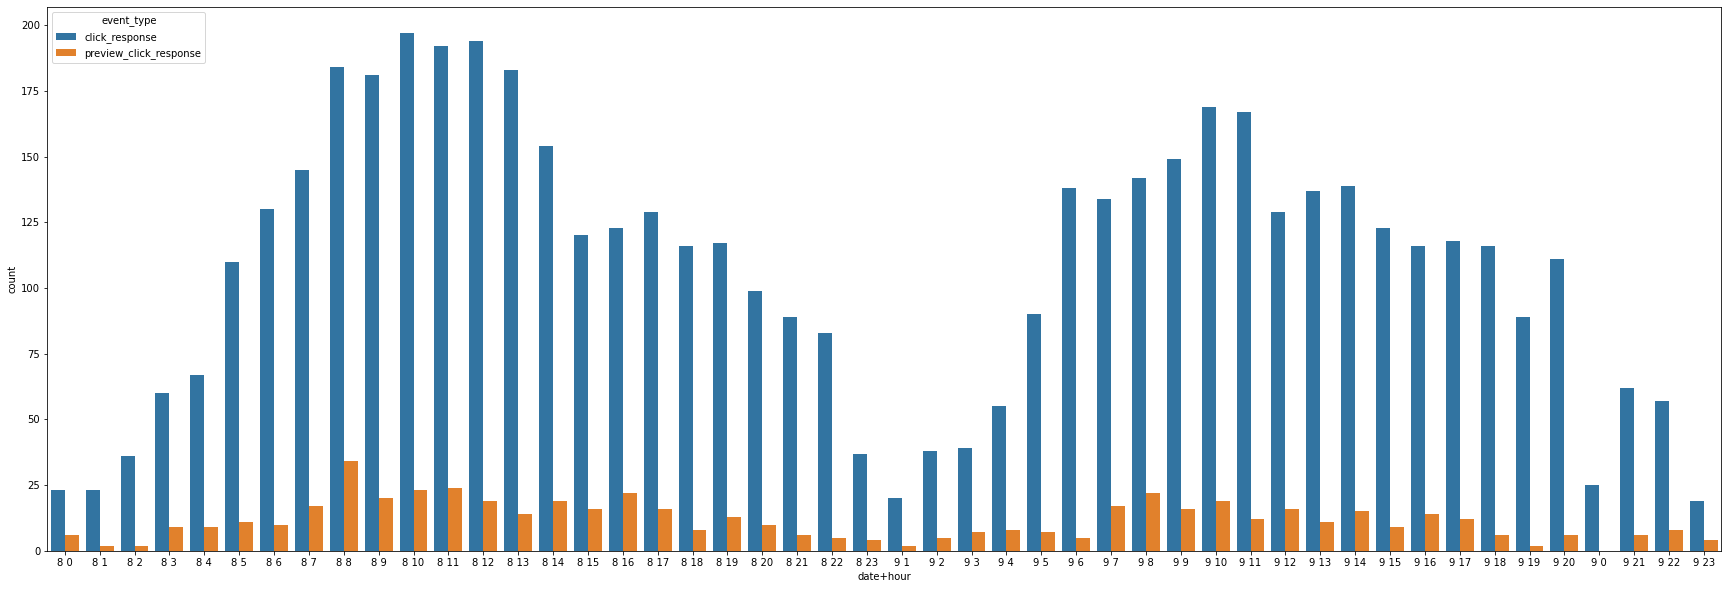

In [168]:
plt.figure(figsize=(30,10))
sns.countplot(data=df_v, x="date+hour", hue="event_type")
plt.show() # это- распределение по времени самой популярной хорошей вакансии

это ничего не дает

рассмотрим одного пользователя

In [174]:
df_1=df[df['cookie_id']=='000cd76cd33f43d4a1ac1d16d10f8bf7']
df_1.sort_values(['event_date','time'])
# preview_click_vacancy раньше show_vacancy. Это странно

,event_date,event_timestamp,vacancy_id_,cookie_id,user_id,event_type,Good,Register,time,hour
314893,2022-08-02,2022-08-02 11:51:29,258338,000cd76cd33f43d4a1ac1d16d10f8bf7,477e719bfbcc4071a8acc1b357492b00,preview_click_vacancy,Bad,зарегистрирован,11:51:29,11
382740,2022-08-02,2022-08-02 11:51:31,258338,000cd76cd33f43d4a1ac1d16d10f8bf7,477e719bfbcc4071a8acc1b357492b00,show_vacancy,Bad,зарегистрирован,11:51:31,11
9268565,2022-09-21,2022-09-21 12:24:12,182454,000cd76cd33f43d4a1ac1d16d10f8bf7,477e719bfbcc4071a8acc1b357492b00,preview_click_vacancy,Bad,зарегистрирован,12:24:12,12
9276661,2022-09-21,2022-09-21 12:24:14,182454,000cd76cd33f43d4a1ac1d16d10f8bf7,477e719bfbcc4071a8acc1b357492b00,show_vacancy,Bad,зарегистрирован,12:24:14,12
9171335,2022-09-21,2022-09-21 12:25:53,258095,000cd76cd33f43d4a1ac1d16d10f8bf7,477e719bfbcc4071a8acc1b357492b00,preview_click_vacancy,Bad,зарегистрирован,12:25:53,12
9214533,2022-09-21,2022-09-21 12:25:54,258095,000cd76cd33f43d4a1ac1d16d10f8bf7,477e719bfbcc4071a8acc1b357492b00,show_vacancy,Bad,зарегистрирован,12:25:54,12
11565676,2022-09-21,2022-09-21 12:26:34,258095,000cd76cd33f43d4a1ac1d16d10f8bf7,477e719bfbcc4071a8acc1b357492b00,click_response,Good,зарегистрирован,12:26:34,12
9214532,2022-09-21,2022-09-21 12:26:53,258095,000cd76cd33f43d4a1ac1d16d10f8bf7,477e719bfbcc4071a8acc1b357492b00,show_vacancy,Bad,зарегистрирован,12:26:53,12
9223159,2022-09-21,2022-09-21 12:27:08,243946,000cd76cd33f43d4a1ac1d16d10f8bf7,477e719bfbcc4071a8acc1b357492b00,preview_click_vacancy,Bad,зарегистрирован,12:27:08,12
9254452,2022-09-21,2022-09-21 12:27:09,243946,000cd76cd33f43d4a1ac1d16d10f8bf7,477e719bfbcc4071a8acc1b357492b00,show_vacancy,Bad,зарегистрирован,12:27:09,12


Найдена необъяснимая аномалия

In [178]:
df_2=df[df['cookie_id']=='c202f8aab3794c55b39d3f353963e46c']
df_2.sort_values(['event_date','time'])

,event_date,event_timestamp,vacancy_id_,cookie_id,user_id,event_type,Good,Register,time,hour
12109342,2022-08-08,2022-08-08 08:18:53,116823,c202f8aab3794c55b39d3f353963e46c,cf629fb1a90149db867510e0ee8e8f6a,preview_click_response,Good,зарегистрирован,08:18:53,8
12109343,2022-08-08,2022-08-08 08:18:55,116823,c202f8aab3794c55b39d3f353963e46c,cf629fb1a90149db867510e0ee8e8f6a,preview_click_response,Good,зарегистрирован,08:18:55,8
12109340,2022-08-08,2022-08-08 08:18:56,116823,c202f8aab3794c55b39d3f353963e46c,cf629fb1a90149db867510e0ee8e8f6a,preview_click_response,Good,зарегистрирован,08:18:56,8
12109341,2022-08-08,2022-08-08 08:18:57,116823,c202f8aab3794c55b39d3f353963e46c,cf629fb1a90149db867510e0ee8e8f6a,preview_click_response,Good,зарегистрирован,08:18:57,8
12109344,2022-08-08,2022-08-08 08:18:57,116823,c202f8aab3794c55b39d3f353963e46c,cf629fb1a90149db867510e0ee8e8f6a,preview_click_response,Good,зарегистрирован,08:18:57,8
12109345,2022-08-08,2022-08-08 08:18:57,116823,c202f8aab3794c55b39d3f353963e46c,cf629fb1a90149db867510e0ee8e8f6a,preview_click_response,Good,зарегистрирован,08:18:57,8
1321394,2022-08-08,2022-08-08 08:19:00,116823,c202f8aab3794c55b39d3f353963e46c,cf629fb1a90149db867510e0ee8e8f6a,show_vacancy,Bad,зарегистрирован,08:19:00,8
1492541,2022-08-08,2022-08-08 08:19:00,116823,c202f8aab3794c55b39d3f353963e46c,cf629fb1a90149db867510e0ee8e8f6a,preview_click_vacancy,Bad,зарегистрирован,08:19:00,8
11693338,2022-08-08,2022-08-08 08:19:07,116823,c202f8aab3794c55b39d3f353963e46c,cf629fb1a90149db867510e0ee8e8f6a,click_response,Good,зарегистрирован,08:19:07,8
1321395,2022-08-08,2022-08-08 08:19:22,116823,c202f8aab3794c55b39d3f353963e46c,cf629fb1a90149db867510e0ee8e8f6a,show_vacancy,Bad,зарегистрирован,08:19:22,8


# Рассмотрим вакансии 3х cookie_id

### 1. Cookie_id, у которого максимальное взаимодействие с заявками

Для этого найдем Cookie_id, которое максимально часто встречается в датасете

In [179]:
df['cookie_id'].value_counts()

924398d361a0454c8c30845c2b4c5747    4898
7d8cc5a0fef44378a2d90a237cda288e    3343
5934d5b8a0b348829d8efabe69c733eb    3315
b7dd2f20fdd6472ab62f8d86a739cd5d    3312
353b56c4fa6447d0ba0f08b42d86e51f    2795
                                    ... 
1b4240c448df47f29e00ef38b8215ea2       5
99c776f7ff1d4e73919342365bc0de0a       5
f84c882a92d74646bfc6eb4447b11d3c       5
9b86c05707bc43d19dfaf60563627c2d       5
694ea921f0d14d56853bf9856866110d       5
Name: cookie_id, Length: 330180, dtype: int64

Далее рассмотрим датасет с этим cookie_id

In [181]:
df_0=df[df['cookie_id']=='924398d361a0454c8c30845c2b4c5747']
df_0.sort_values(['event_date','time'])

,event_date,event_timestamp,vacancy_id_,cookie_id,user_id,event_type,Good,Register,time,hour
1024598,2022-08-06,2022-08-06 08:33:31,260154,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,show_vacancy,Bad,зарегистрирован,08:33:31,8
1064575,2022-08-06,2022-08-06 08:33:31,260154,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_vacancy,Bad,зарегистрирован,08:33:31,8
12270295,2022-08-06,2022-08-06 08:33:34,260154,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,click_favorite,Good,зарегистрирован,08:33:34,8
12239122,2022-08-06,2022-08-06 08:33:44,111109,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_favorite,Bad,зарегистрирован,08:33:44,8
12239401,2022-08-06,2022-08-06 08:33:50,118895,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_favorite,Bad,зарегистрирован,08:33:50,8
...,...,...,...,...,...,...,...,...,...,...
2445560,2022-08-16,2022-08-16 11:23:06,132596,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_vacancy,Bad,зарегистрирован,11:23:06,11
2447752,2022-08-16,2022-08-16 11:23:13,246355,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_vacancy,Bad,зарегистрирован,11:23:13,11
11279134,2022-08-16,2022-08-16 11:24:12,178089,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,click_response,Good,зарегистрирован,11:24:12,11
2436631,2022-08-16,2022-08-16 11:24:28,164638,924398d361a0454c8c30845c2b4c5747,4185734babb340cb84dcfa8241a9766d,preview_click_vacancy,Bad,зарегистрирован,11:24:28,11
